# Exploratory Data Analysis for Predicting Health Care Costs and Risk Group Segmentation for an Insurance Company

Overview of the Question: The objective of this project is to explore how personal attributes
such as age, BMI, smoking habits, and geographic region affect medical costs. The primary
question I aim to answer is: How can I predict an individual's medical costs based on their
health and demographic characteristics? Additionally, I seek to understand if I can identify
distinct risk groups based on these attributes to help insurers offer personalized health plans and
optimize premium pricing.

## Data Description:

The dataset I will use for this analysis is the Medical Cost Personal Dataset, which
contains information on individuals' medical expenses and their demographic and health-related
features. The dataset includes 1,338 samples with the following features:
• Age: Continuous value representing the individual's age.
• BMI (Body Mass Index): A measure of body fat based on height and weight.
• Children: The number of children covered by health insurance.
• Sex: Categorical variable indicating gender.
• Smoker: Categorical variable representing whether the individual is a smoker or nonsmoker.
• Region: Categorical variable for the individual's geographic location in the United States.
• Charges: The target variable represents the individual's medical expenses.
This dataset provides a diverse set of features that will help us investigate the relationships
between personal attributes and medical costs.

#### - The data are provided by:
https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv 

### Techniques to Be Used: 
I will employ a combination of machine learning techniques,
including dimensionality reduction, clustering, and predictive modeling, to answer the
research questions. Here are the main methods I might use:
1. **Exploratory Data Analysis (ECA):** I will use PCA to reduce the dimensionality of
the dataset, focusing on the most significant components that explain the variation in
medical costs. PCA will help us simplify the dataset while preserving the most important
patterns. By reducing the number of features, I aim to improve interpretability and make
the clustering and modeling steps more efficient.

2. **Predictive Modeling (Linear Regression/Random Forest):** I will build a regression
model to predict the target variable, medical charges, based on the input features. Both
Linear Regression and Random Forest models will be explored to assess which
performs better in predicting medical costs. I will evaluate the model using metrics such
as mean squared error (MSE) and R-squared to determine how well our models
generalize to new data.

3. **Clustering (KMeans):**  I will use KMeans clustering to segment individuals into
   different cost tiers based on their health and demographic attributes. This
clustering will help us identify common characteristics among high-cost individuals (e.g.,
smokers, high BMI, older age). The goal is to group individuals into low, medium, and
high-risk categories, which can assist insurance companies in tailoring premiums based
on health risk profiles.

 4. Additionally, I will evaluate the model's ability to provide insights into which factors
(e.g., smoking status, BMI, age) are the most significant predictors of high medical costs.

Expected Insights: Through this project, I expect to uncover valuable insights, such as:

• **Key Drivers of Medical Costs:** Identify the main factors (e.g., smoking, high BMI) that
significantly contribute to increased medical expenses.

• **Segmentation of Cost Groups:** By clustering individuals, I hope to identify distinct
groups that share similar risk profiles, providing a basis for personalized health
interventions or premium adjustments.

• **Predictive Models:** A regression model that accurately predicts medical costs will be
highly useful for health insurance companies looking to forecast expenses and offer
competitive premiums based on individual characteristics.


## Standard package imports

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

warnings.filterwarnings("ignore")
#matplotlib.style.use("ggplot")
%matplotlib inline

## Load the Data

In [4]:
df = pd.read_csv("insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
12,23,male,34.400,0,no,southwest,1826.84300
812,54,male,21.010,2,no,southeast,11013.71190
647,40,female,23.370,3,no,northeast,8252.28430
481,49,male,37.510,2,no,southeast,9304.70190
521,32,female,44.220,0,no,southeast,3994.17780
762,33,male,27.100,1,yes,southwest,19040.87600
62,64,male,24.700,1,no,northwest,30166.61817
126,19,female,28.300,0,yes,southwest,17081.08000
868,61,male,23.655,0,no,northeast,13129.60345
764,45,female,25.175,2,no,northeast,9095.06825


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### INSIGHTS:
- The mean charges =13,270\$, the premium for insurance policy needed to break even with cost if all patients are to be pay the same cost. For simplicity, I will use 13K as an estimate of the minimum premium for insurance policy.
- The 25th percentile or Q1 for charges is 4740\$ those are considered low risk policy holder as they cost the insurance company less than what the typical premium. 
- Policy holders who charge more than Q3 (16.6K) are ahigher liability for the insurer.
- The max policy charges were about 64k. (probably an older dataset or the outliers were already removed). 
- Number of children insured ranged from 0-5 in this data.
- Age ranged from 18-64 in this data, this is the age of the policy holder not their children so makes sense to be 18 or older. 
- Pateints older than 64 were not represented here, possiply because they use medicare after age 65.


### Are there any duplicates?


In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [16]:
# checking for duplicates
df.duplicated(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges']).sum()


1

In [18]:
# This will display all duplicate rows (excluding the first occurrence)
df[df.duplicated(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges'])]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [20]:
## Drop Duplicated row 581
df.drop_duplicates(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges'], keep='first', inplace=True)


In [22]:
df.duplicated(subset=['age', 'sex', 'bmi', 'smoker', 'region', 'charges']).sum()

0

#### Key findings: 
- The sample size= 1337 (after removing duplicates),
- Charges have the following 5-number summary: 1122, 4740, 9382, 16640, 63770 (rounded to the nearest dollar)
- Max/Min  values of charges are within the range of plausible values. The mean charges=13,270$

### Are there any Null values in the data?

In [27]:
## Getting counts and percentages of missing values for each column
df.isna().sum()
df.isna().mean().round(2).multiply(100).sort_values(ascending= False)


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

#### Removed duplicated rows, New sample size= 1337. No issues with Missing Data

### 🔍 Exploratory Data Analysis (EDA): Basic Distributions and Correlations

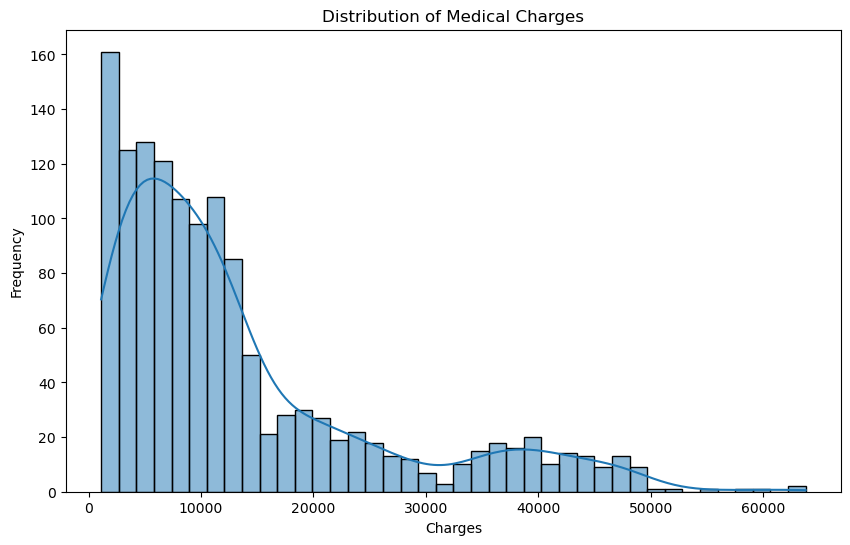

In [30]:

# Histogram of medical charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.savefig("eda_output/charges_hist.png")
plt.show()


### Insights: 
- The distribution of charges is positively skewed, with seemingly three population clusters. 
- Policyholders who cost the insurance company less than $ 13,000 are the majority of policyholders, with high-frequency, near-zero charges likely reflecting healthy policyholders who use minimal healthcare or healthy individuals with charges for annual exams or routine checkups only.
- There is another cluster of charges between 15-30 k, then another group between 30-50 K, followed by some outliers between 50-60k

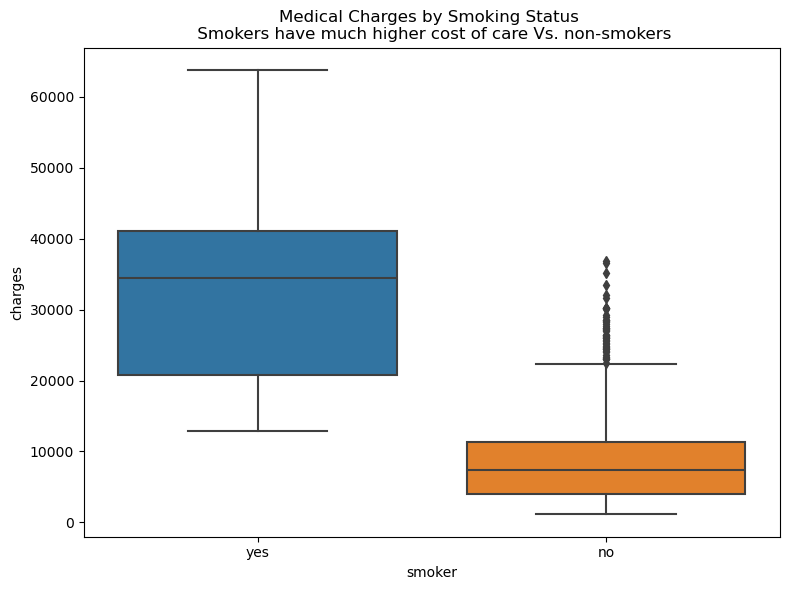

In [33]:

# Boxplot for charges vs smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Medical Charges by Smoking Status \n Smokers have much higher cost of care Vs. non-smokers")
plt.tight_layout()
plt.savefig("eda_output/charges_by_smoker.png")
plt.show()


## Business Insights: 
- Huge difference between cost of health care (charges) for smokers Vs non-smokers. 
- Insurance companies should provide discounts to non-smokers and consider supporting smoking cessation programs to reduce their overall costs in the long run (unless the insured switch jobs or their employer switch providers, they tend to keep the same insurance).
- It is reasonable to charge higher premiums to smokers to as the median charges for smokers nearly 35 K vs 5 K for non-smokers justify the surcharge and might give smokers stronger insentive to consider quitting smoking.

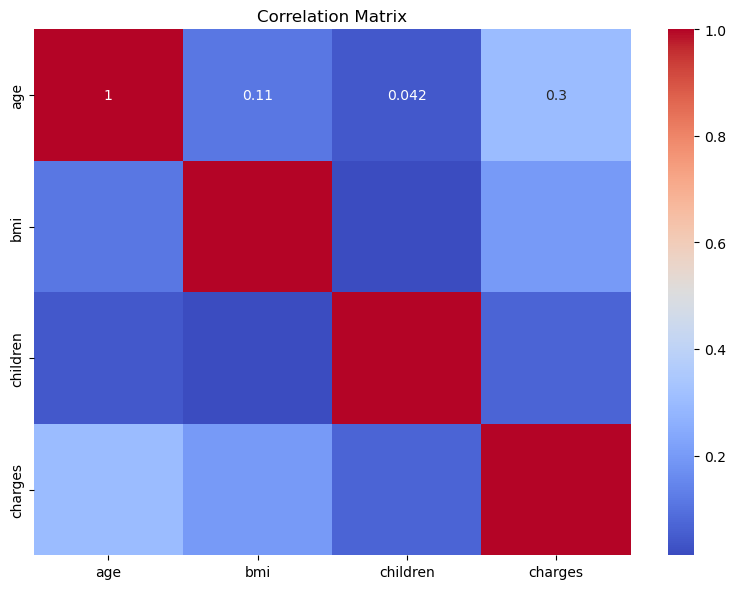

In [36]:

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("eda_output/correlation_heatmap.png")
plt.show()


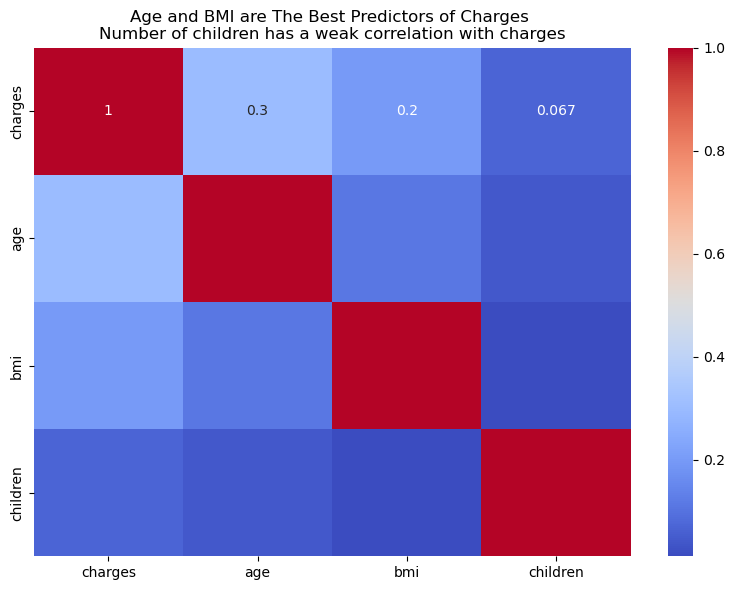

In [38]:
### Modify to highlight charges vs other predictors
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Reorder so 'charges' is first
cols = ['charges'] + [col for col in corr.columns if col != 'charges']
corr = corr.loc[cols, cols]

# Plot the full reordered correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Age and BMI are The Best Predictors of Charges \nNumber of children has a weak correlation with charges")
plt.tight_layout()
plt.savefig("eda_output/correlation_heatmap.png")
plt.show()


## Conclusion: 
1. Charges are significantly skewed to the right. This is typical with financial data.
2. The density indicates four tiers of charges: 0- 15k, 15-30, 30-50, and a few outliers at over 50k.
3. Smokers have a much higher cost of care than non-smokers 

### Exploratory Data Analysis

In [40]:
import matplotlib.pyplot as plt

def plot_hist(df, feature_name, log=False, bins=50):
    data = df[feature_name]
    if log:
        data = np.log1p(data)
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, edgecolor='k')
    plt.title(f"Histogram of {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


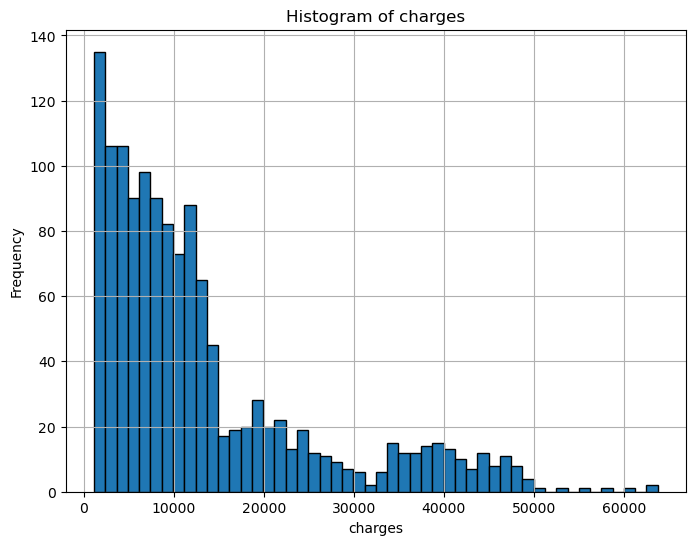

In [42]:
plot_hist(df, feature_name="charges", log=False)

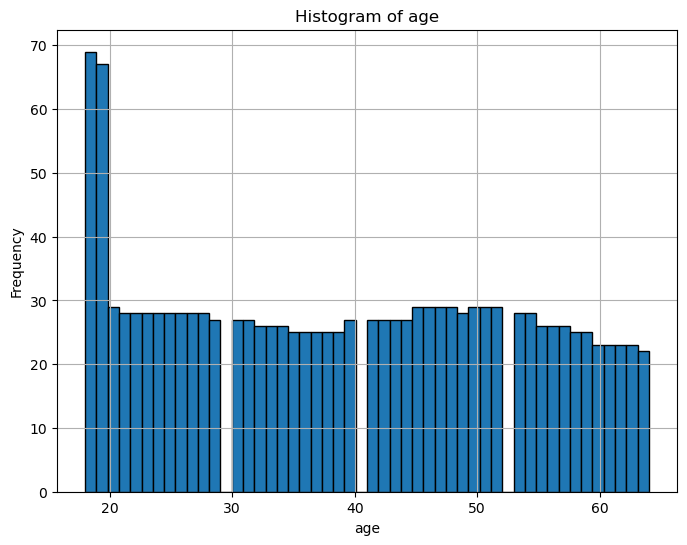

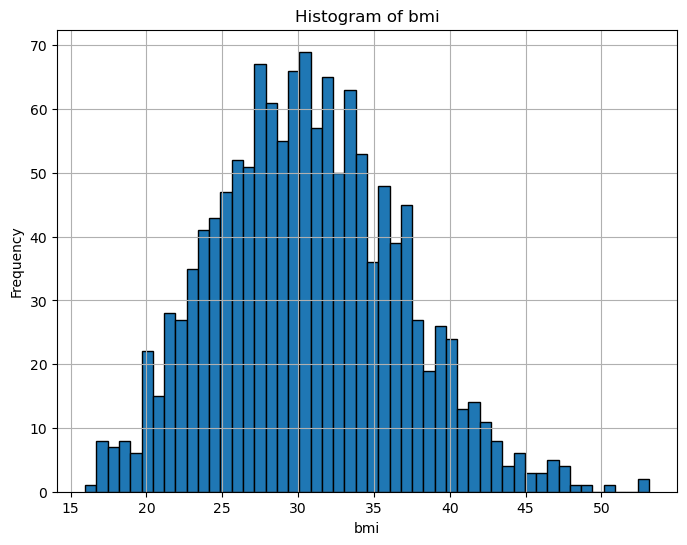

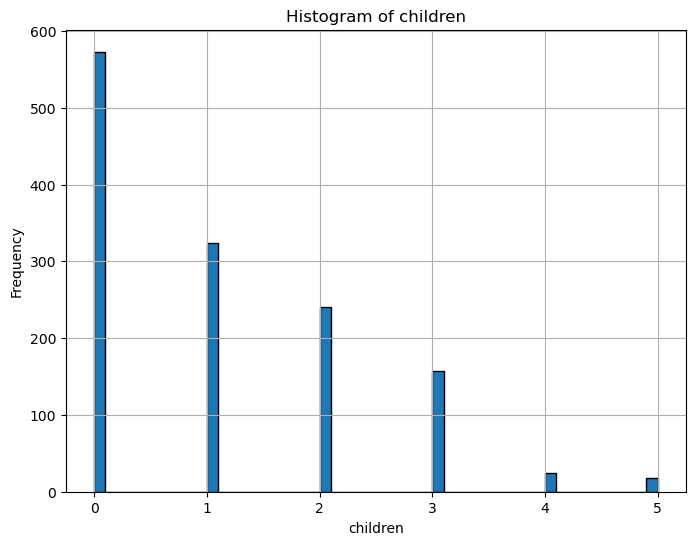

In [44]:
for name in ['age', 	'bmi', 	'children']:
    plot_hist(df, feature_name=name, log=False)
   

## Insights:
1. Age 18 and 19 are overrepresented in the data. The rest of the ages 20-64 have a uniform distribution. 
2. BMI has a right-skewed distribution. 
3. The number of children ranged from 0-5, with the majority of the insured having 0-2 children and very few having 4-5 children.


## age 	sex 	bmi 	children 	smoker 	region 	charges

Text(0.5, 1.0, 'Boxplot of the charges shows skewness & outliers \n Most insured cost less than 35K')

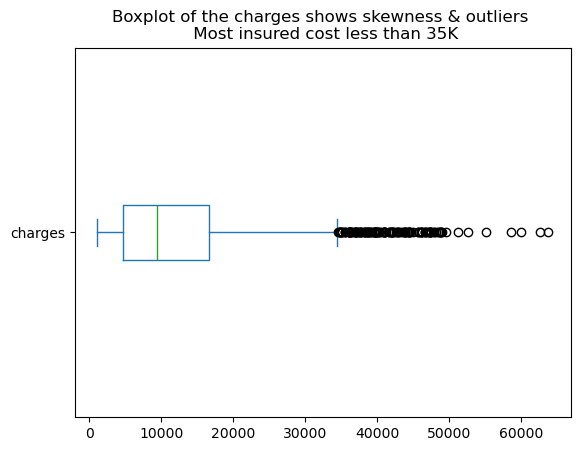

In [48]:
df["charges"].plot(kind = "box", vert = False);
plt.title("Boxplot of the charges shows skewness & outliers \n Most insured cost less than 35K") 


## Bivariate EDA:

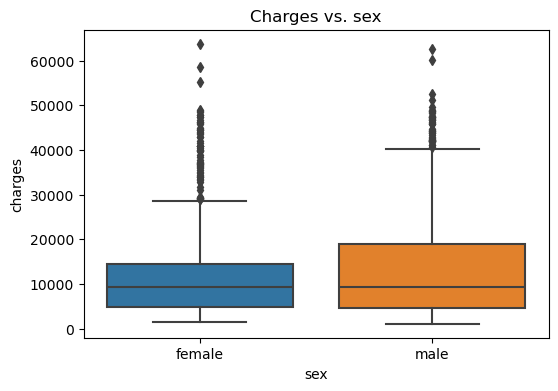

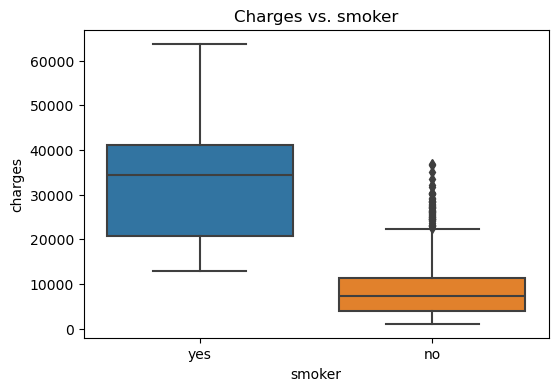

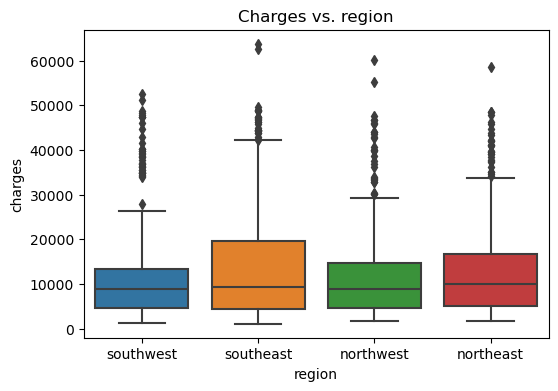

In [51]:
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=df[col], y=df['charges'])
    plt.title("Charges vs. "+ col)
    plt.show()

### Insights:
1. There is a linear relation between Age and the median charges.
2. The charges per region seem to have similar medians, but the region Southeast appears to have a higher variability in charges Vs the other regions. 
Regardless of region, the distributions are all skewed right with a large number of outliers.
3. There is a huge diff between smokers and non-smokers with smokers charging much more than non-smokers. 
4. Higher charges associated with higher BMI.
5. Charges have comparable medians by Sex with more variability among males. 
6. comparable median charges for different number of childrens. 


### Exploring bivariate relationships within numerical variables.

In [55]:
numeric_col =['charges', 'age','bmi','children']
corr = df[numeric_col].corr().round(2)

<Axes: >

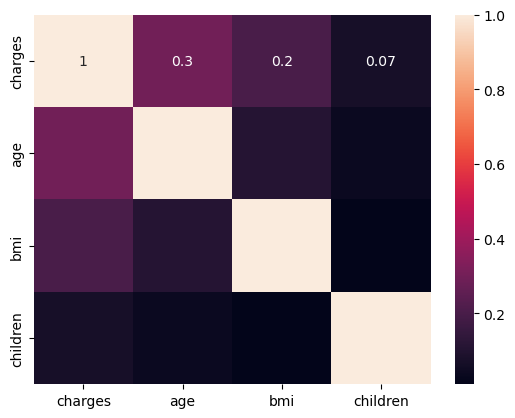

In [57]:
sns.heatmap(corr, annot=True)

#### **Conclusion:** There is a weak positive linear correlation between charges and age, bmi, children (listed in decreasing order by strength or the correlation). 

### Visualizing scatter plots:

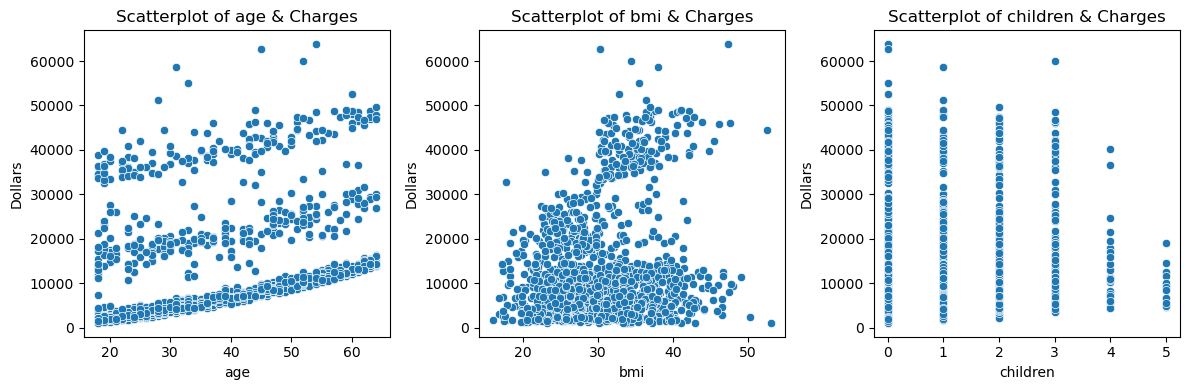

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
numeric_col =['age','bmi','children']
for i, column in enumerate(numeric_col):
    sns.scatterplot(x=df[column], y=df['charges'], ax=axes[i])
    axes[i].set_title(f'Scatterplot of {column} & Charges')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.savefig("eda_output/Charges vs. Numerical Variables.png")

plt.show()

### Conclusion: 
1. Weak positive linear relation between Charges and age, bmi. 
2. Weak negative linear association between charges and the number of children. 

### Exploring bivariate relations between age and charges colorded by sex, smoker and region

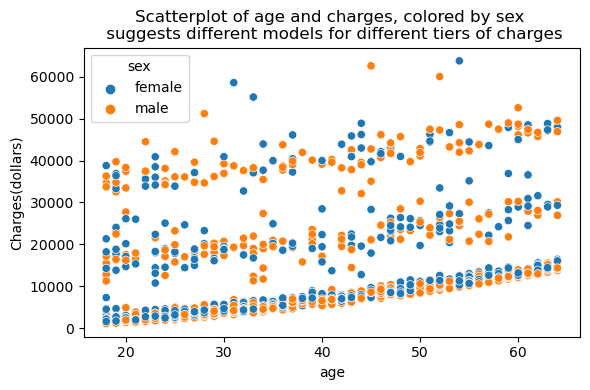

In [63]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['sex'])

plt.title('Scatterplot of age and charges, colored by sex \n suggests different models for different tiers of charges')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output/charges_Vs_Age_by_Sex.png")
plt.show()

**Insights:** The graph suggests three clusters where there is a strong linear association between age and charges within the less than 10K group, 
weaker relation within the moderate cost group and weaker relation with outliers for the higher than 30K cost group. 

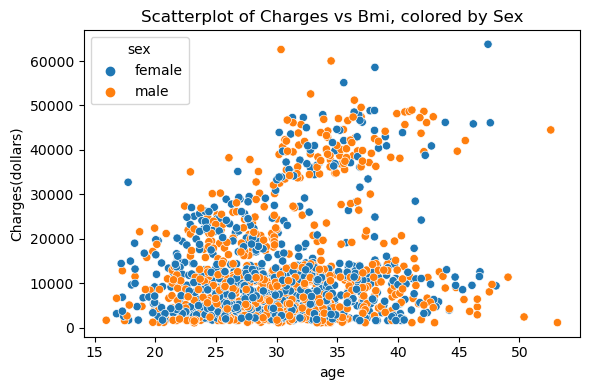

In [66]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['sex'])

plt.title('Scatterplot of Charges vs Bmi, colored by Sex')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')
plt.savefig("eda_output/Charges_Vs_Bmi_by_Sex.png")
plt.tight_layout()
plt.show()

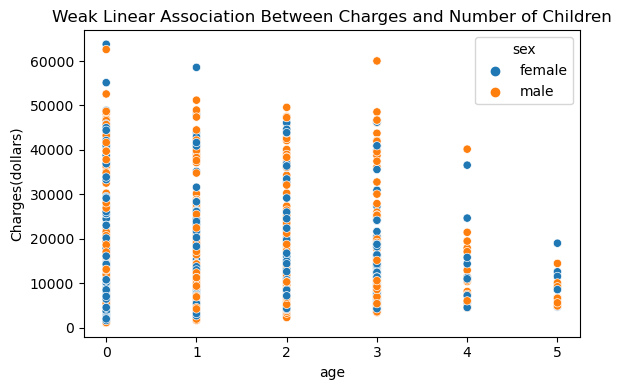

In [67]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['children'], y=df['charges'], hue=df['sex'])

plt.title('Weak Linear Association Between Charges and Number of Children')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output/Charges_Vs_ Children.png")
plt.show()

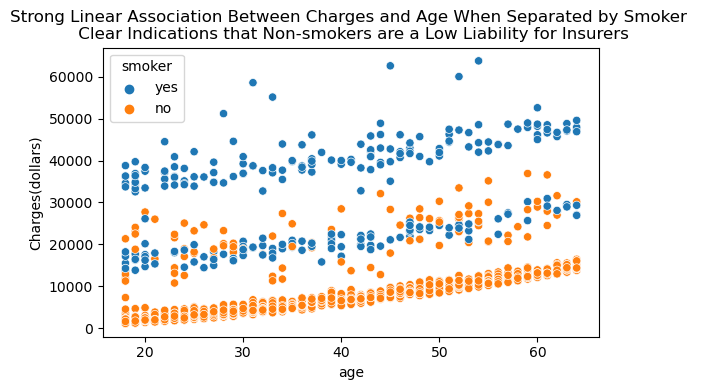

In [69]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'])

plt.title('Strong Linear Association Between Charges and Age When Separated by Smoker \n Clear Indications that Non-smokers are a Low Liability for Insurers')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output/Charges_Age_by_Smoker.png")
plt.show()

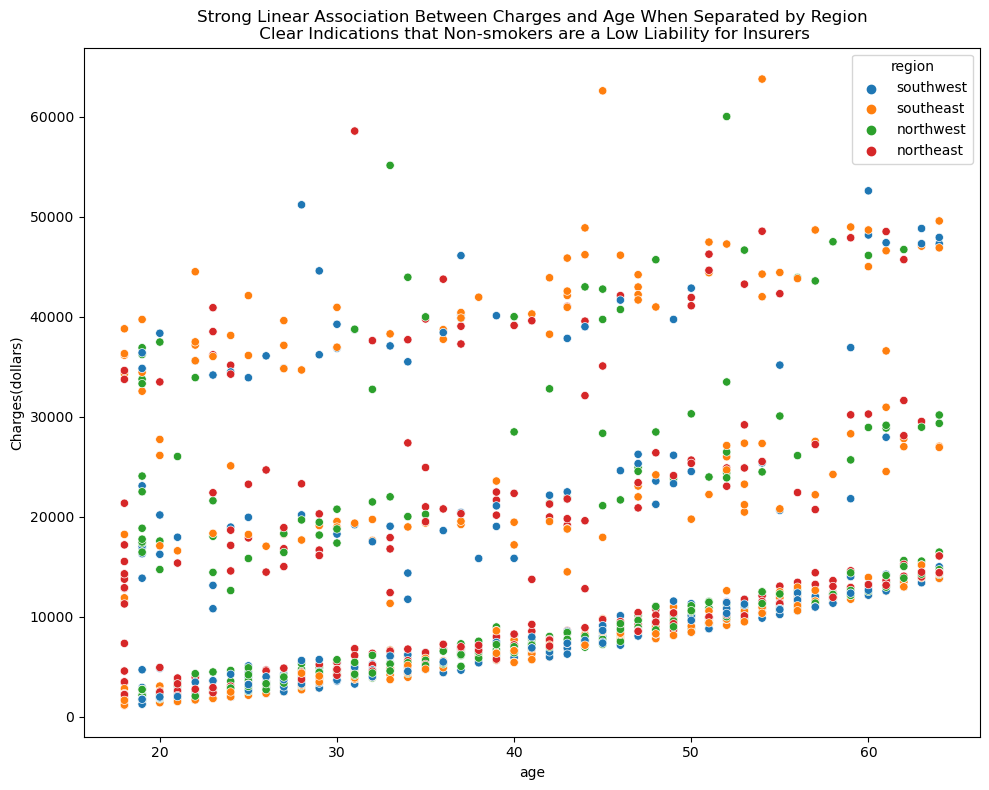

In [70]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['region'])

plt.title('Strong Linear Association Between Charges and Age When Separated by Region\n Clear Indications that Non-smokers are a Low Liability for Insurers')
plt.xlabel('age')
plt.ylabel('Charges(dollars)')

plt.tight_layout()
plt.savefig("eda_output\Charges_Vs_Age_Region.png")
plt.show()

**Insights** Again we see three parallel lines can be a good fit for the data, indicating that we should look into clusters by charges or create indicator variables for low, medium, and high charges. In other words, there are different lines fitted to charges Vs age depending on the category of charges, No clear separation between the regions indicating that the region is a weak predictor of charges or no sig diff between regions. 

<Figure size 1000x800 with 0 Axes>

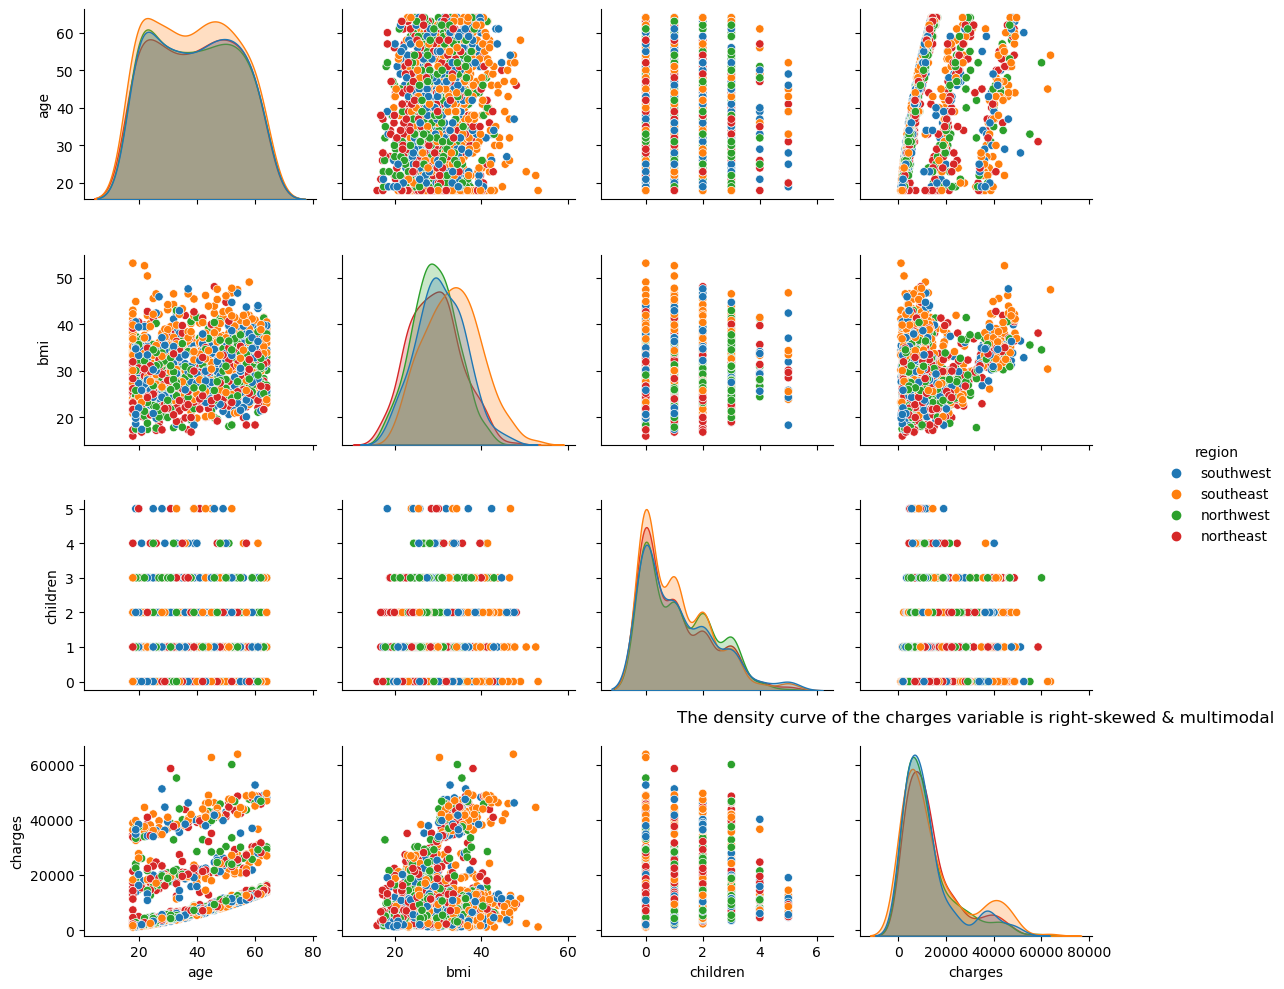

In [75]:
# Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='region')

plt.title('The density curve of the charges variable is right-skewed & multimodal')
plt.tight_layout()
plt.savefig("eda_output\Pairs_Quan_Variables.png")
plt.show()

**Insight:**
We notice the multimodal density curve for the charges variable and the skewness of the charges distribution across all four regions. 

In [77]:
## Compute the median price for each manufacturer:
df.groupby("region")["charges"].median().round(3).sort_values(ascending=False)

region
northeast    10057.652
southeast     9294.132
northwest     8976.977
southwest     8798.593
Name: charges, dtype: float64

**Insight** The region Northeast has the highest median charges, followed by SE, NW, SW.

## Splitting the Data into Training and Test Sets

In [80]:
# Define your features (X) and your target variable (y)
# i DROPPED TITLE_STATUS TO SIMPLIFY MODELING 
X = df[['age','bmi','children','smoker', 'sex', 'region']]  
y = df['charges']  # This is our target variable
# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,bmi,children,smoker,sex,region
1114,23,24.510,0,no,male,northeast
968,21,25.745,2,no,male,northeast
599,52,37.525,2,no,female,northwest
170,63,41.470,0,no,male,southeast
275,47,26.600,2,no,female,northeast


In [81]:
y_train.head()

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
Name: charges, dtype: float64

In [86]:
X_test.head()

,age,bmi,children,smoker,sex,region
900,49,22.515,0,no,male,northeast
1064,29,25.600,4,no,female,southwest
1256,51,36.385,3,no,female,northwest
298,31,34.390,3,yes,male,northwest
237,31,38.390,2,no,male,southeast


In [88]:
y_test.head()

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
Name: charges, dtype: float64

In [90]:
print(f"Train set size: {X_train.shape}. Number of labels in the trian set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

Train set size: (1069, 6). Number of labels in the trian set: (1069,)
Test set size: (268, 6). Number of labels in the test set: (268,)


## Model Regularization 

In [93]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [95]:
# Define numerical and categorical features
numerical_columns  = ['age','bmi','children']
categorical_columns = ['smoker', 'sex','region'] ## condition can be encoded as ordinal 

In [97]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standarize numerical features
        ('cat', OneHotEncoder(), categorical_columns)  # One-Hot encoding for categorical features
    ])

In [99]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [101]:
X_train_processed

array([[-1.1576804 , -0.99692768, -0.90790804, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30061876, -0.79276204,  0.7669042 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91492586,  1.15466402,  0.7669042 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.37208794, -1.4118716 , -0.07050192, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08564268, -0.41997378,  1.60431032, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30005022,  0.87941237,  0.7669042 , ...,  0.        ,
         1.        ,  0.        ]])

In [103]:
X_test_processed 

array([[ 0.70051832, -1.3267337 , -0.90790804, ...,  0.        ,
         0.        ,  0.        ],
       [-0.72886531, -0.8167329 ,  2.44171645, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.84345668,  0.96620343,  1.60431032, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.22914958,  0.6678075 ,  0.7669042 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.5581485 ,  0.95215155, -0.07050192, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.55757996, -1.02833777, -0.90790804, ...,  0.        ,
         0.        ,  0.        ]])

In [105]:
# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for the categorical columns.
# Check the shape of the processed data
print("Shape of X_train_processed:", X_train_processed.shape)  # Check the number of columns
print("Shape of X_test_processed:", X_test_processed.shape)    # Check the number of columns

# Get the feature names for the categorical columns
name_categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine numerical and categorical column names
name_all_columns = list(numerical_columns) + list(name_categorical_columns)
print(name_all_columns)
len(name_all_columns)

Shape of X_train_processed: (1069, 11)
Shape of X_test_processed: (268, 11)
['age', 'bmi', 'children', 'smoker_no', 'smoker_yes', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


11

## Multiple Linear Regression Model to Predict the Cost of Care

In [108]:
# Check the number of columns in the processed data
print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

# Check the length of the column names list
print(f"Number of columns in name_all_columns: {len(name_all_columns)}")
print(name_all_columns)
print(type(name_all_columns))
print(type(X_train_processed))
print(type(X_test_processed))

Shape of X_train_processed: (1069, 11)
Shape of X_test_processed: (268, 11)
Number of columns in name_all_columns: 11
['age', 'bmi', 'children', 'smoker_no', 'smoker_yes', 'sex_female', 'sex_male', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [110]:
from sklearn.linear_model import LinearRegression
MRM_model = LinearRegression()
MRM_model.fit(X_train_processed, y_train)

LinearRegression()

In [112]:
y_pred = MRM_model.predict(X_test_processed)

In [114]:
len(y_pred)

268

In [116]:
# Coefficients
coefs = MRM_model.coef_
for name, coef in zip(name_all_columns, coefs):
    print(f"Feature: {name:<20} Coefficient: {coef:.4f}")

Feature: age                  Coefficient: 3472.9756
Feature: bmi                  Coefficient: 1927.8283
Feature: children             Coefficient: 636.5012
Feature: smoker_no            Coefficient: -11538.8823
Feature: smoker_yes           Coefficient: 11538.8823
Feature: sex_female           Coefficient: 50.7710
Feature: sex_male             Coefficient: -50.7710
Feature: region_northeast     Coefficient: 472.4552
Feature: region_northwest     Coefficient: 80.6938
Feature: region_southeast     Coefficient: -366.4644
Feature: region_southwest     Coefficient: -186.6845


In [118]:
std = df.select_dtypes(include=['number']).std().to_frame(name='Standard Deviation').rename_axis('Feature').reset_index()
std

,Feature,Standard Deviation
0,age,14.044333
1,bmi,6.100468
2,children,1.205571
3,charges,12110.359656


In [120]:
## Obtain the y-intercept:
yintercept = MRM_model.intercept_
print(f"{yintercept:.2f}")

19963.61


In [122]:
# Some code to obtain the unstandarized coefficients

std_numerical = std[std['Feature'].isin(numerical_columns)]['Standard Deviation'].values

# Unstandarized coefficients for numerical columns
coefs_unstandarized_numerical = coefs[:len(numerical_columns)] / std_numerical

# Coefficients for categorical variables (no need to unstandarized)
coefs_cat = coefs[len(numerical_columns):]

# Put together
coefs_desst = np.concatenate([coefs_unstandarized_numerical, coefs_cat])

# Adjust the y-intercept so it's also unstandarized
numerical_means = preprocessor.named_transformers_['num'].mean_
yintercept_unst = yintercept - np.sum(coefs[:len(numerical_columns)] * numerical_means / std_numerical)

# Create final table
final_table = pd.DataFrame({
    'Feature': name_all_columns,
    'Standard Deviation': list(std_numerical) + ['N/A'] * len(name_categorical_columns),
    'Original Coefficients': coefs,
    'Unstandarized Coefficients': coefs_desst
})

# Add y-intercept
table_yintercept = pd.DataFrame({
    'Feature': ['y_intercpt'],
    'Standard Deviation': ['N/A'],
    'Original Coefficients': [yintercept],
    'Unstandarized Coefficients': [yintercept_unst]
})

# Put the two dfs together
final_table = pd.concat([final_table, table_yintercept], ignore_index=True)
final_table.sort_values('Unstandarized Coefficients', key=abs, ascending=False)

,Feature,Standard Deviation,Original Coefficients,Unstandarized Coefficients
4,smoker_yes,N/A,11538.882296,11538.882296
3,smoker_no,N/A,-11538.882296,-11538.882296
2,children,1.205571,636.501185,527.966382
7,region_northeast,N/A,472.455206,472.455206
9,region_southeast,N/A,-366.464410,-366.464410
1,bmi,6.100468,1927.828251,316.013152
0,age,14.044333,3472.975553,247.286619
10,region_southwest,N/A,-186.684546,-186.684546
8,region_northwest,N/A,80.693751,80.693751
5,sex_female,N/A,50.771027,50.771027


### Interpretation of the fitted coefficients:

- **y-intercept:**  The expected cost of health care is approximately 20K when all the input features are at their mean values in the dataset.

- **smoker_yes:** 	increases the cost by 11.5 thousand dollars compared to non-smokers.	

 - **BMI:** For each additional unit in BMI, the cost increases $316, if all other variables are held fixed.

- **Children:** For each additional child in the family, the cost increases by $528 if all other variables are fixed.

- **Sex_female:** For females, the cost increases by 51 dollars compared to males with the same age, BMI, etc.

-  The fitted coefficient shows the mean cost for the region variables if all other variables are at their mean value in the dataset. This is helpful in comparing the group means. Southern regions have a lower average cost compared to northern ones.


### Performance Evaluation:

In [129]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
# R² (Determination coefficient)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.8069287081198012


**Interpretation** The multiple linear model is explaining 78\% of the variability in the cost of health care based on teh demographics data of the insured. 

In [134]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 5956.342894363587


### Interpretation:
Root mean squiared error is nearly 5800 dollar. 

**Next Steps** 
- Consider classification algorithms to segment patients based on cost and demo vars that could predict chagres. 
- Explore better models to improve the predictive models, we have 78% for the determination coefficient, can this be improved? 
- Model validation, deployment, and exploring non-linear models. 

### Prediction and Clustering: 
Based on the boxplots of charges, we can categorize the policy holdders into quartiles where charges between 0-20 K are the lowest liability group, 20-35K are a second tier group and over 35k are higher liability. Of interest is to see if these tiers are predictable based on patient attributes and demographics data.

### Feature Engineering & Model Enhancements: 

In [150]:
## Creating categorical variable to reflect charge tiers and possibly classify the policy holders 
## based on their charge teirs for predication of pricing purposes

bins = [0, 4740, 9382, 16640, 63770]
labels = ['Very Low', 'Low', 'Medium', 'High']

df['charge_category'] = pd.cut(df['charges'], bins=bins, labels=labels, include_lowest=True)

# Check distribution
print(df['charge_category'].value_counts())


charge_category
Very Low    334
Low         334
Medium      334
High        334
Name: count, dtype: int64


#### This might not be the best way to group the data as it does not account for practical considerations and typical insurance premuims. 
#### The histogram of the data reveiled some more interesting clusters where the data seems to come from a mixture of different groups. 


In [166]:

# Modified version
bins = [0,10000, 30000, 40000, 63770]
labels = ['<=10K',  '10-30 K', '30-40 K', 'Over 40K']

df['charge_category'] = pd.cut(df['charges'], bins=bins, labels=labels, include_lowest=True)

# Check distribution
print(df['charge_category'].value_counts())


charge_category
<=10K       712
10-30 K     464
30-40 K      83
Over 40K     78
Name: count, dtype: int64


In [172]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,charge_category
1031,55,female,35.200,0,yes,southeast,44423.80300,Over 40K
1002,24,male,25.800,0,no,southwest,1972.95000,<=10K
245,54,male,30.020,0,no,northwest,24476.47851,10-30 K
131,61,female,22.040,0,no,northeast,13616.35860,10-30 K
293,22,female,28.820,0,no,southeast,2156.75180,<=10K
698,56,male,33.725,0,no,northwest,10976.24575,10-30 K
383,35,female,43.340,2,no,southeast,5846.91760,<=10K
577,31,female,38.095,1,yes,northeast,58571.07448,Over 40K
731,53,male,21.400,1,no,southwest,10065.41300,10-30 K
317,54,male,32.775,0,no,northeast,10435.06525,10-30 K


In [174]:
# Install this once if not already installed
# pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Encode categorical variables
df_encoded = df.dropna(subset=['charge_category']).copy()
from sklearn.preprocessing import LabelEncoder
for col in ['sex', 'smoker', 'region']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop(columns=['charges', 'charge_category'])
y = df_encoded['charge_category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model\n" + "-"*40)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Dummy Model
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

     10-30 K       0.35      1.00      0.52        93
     30-40 K       0.00      0.00      0.00        17
       <=10K       0.00      0.00      0.00       143
    Over 40K       0.00      0.00      0.00        15

    accuracy                           0.35       268
   macro avg       0.09      0.25      0.13       268
weighted avg       0.12      0.35      0.18       268

Confusion Matrix:
[[ 93   0   0   0]
 [ 17   0   0   0]
 [143   0   0   0]
 [ 15   0   0   0]]

Random Forest Model
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

     10-30 K       0.85      0.78      0.82        93
     30-40 K       0.50      0.65      0.56        17
       <=10K       0.89      0.94      0.91       143
    Over 40K       0.90      0.60      0.72        15

    accuracy                        

## Adding Visualizations & models evaluations

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns


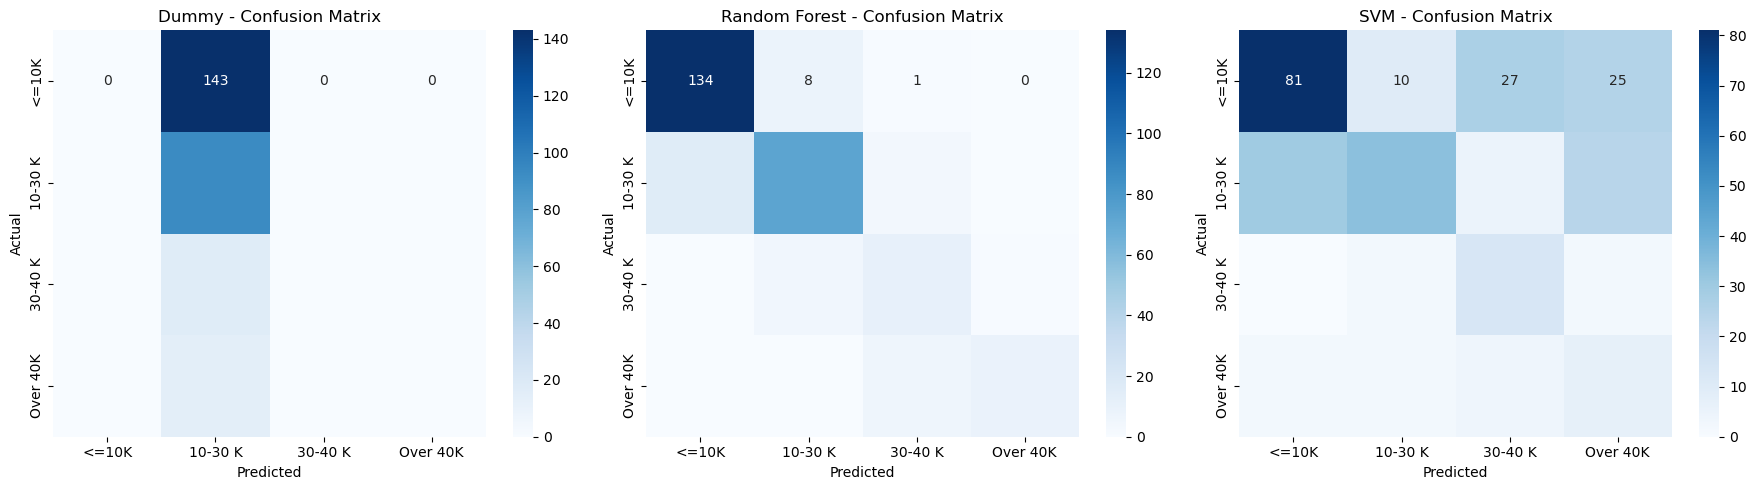

In [181]:
f1_scores = {}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    # Save F1-score (macro)
    f1 = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
    f1_scores[name] = f1

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_xticklabels(labels)
    axes[i].set_yticklabels(labels)

plt.tight_layout()
plt.show()


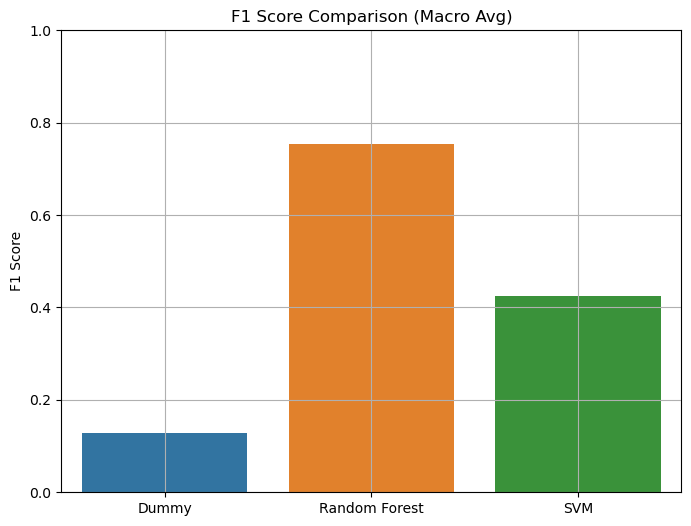

In [183]:

# Bar plot of F1 scores
plt.figure(figsize=(8, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("F1 Score Comparison (Macro Avg)")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [187]:
metrics_summary = {
    "Model": [],
    "F1 Score": [],
    "Precision": [],
    "Recall": [],
    "Accuracy": []
}


In [189]:
from sklearn.metrics import accuracy_score

for i, (name, model) in enumerate(models.items()):
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store macro metrics
    metrics_summary["Model"].append(name)
    metrics_summary["F1 Score"].append(report["macro avg"]["f1-score"])
    metrics_summary["Precision"].append(report["macro avg"]["precision"])
    metrics_summary["Recall"].append(report["macro avg"]["recall"])
    metrics_summary["Accuracy"].append(accuracy_score(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_xticklabels(labels)
    axes[i].set_yticklabels(labels)


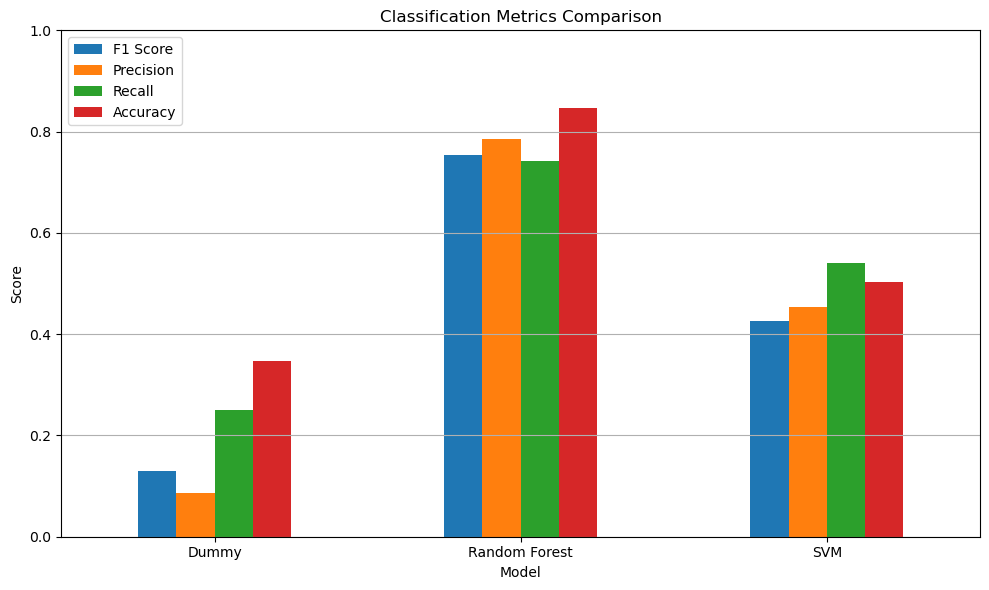

In [193]:
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.set_index("Model", inplace=True)

# Plot grouped bar chart
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Classification Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Conclusion:
The random forest is the best classifier for insurance charges as a target variable.


In [196]:
## Running Random Forest Classifier to identify important features
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Redefine the original regression target
X_reg = df_encoded.drop(columns=['charges', 'charge_category'])
y_reg = df_encoded['charges']

# Train/test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Get feature importances
importances = rf_reg.feature_importances_
features = X_train_reg.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Show top predictors
importance_df.reset_index(drop=True, inplace=True)
importance_df


,Feature,Importance
0,smoker,0.599067
1,bmi,0.217126
2,age,0.137448
3,children,0.023516
4,region,0.015703
5,sex,0.007141


The Random Forest Regressor identifies the following as the top predictors of the charges variable (i.e., healthcare costs):
Rank	Feature	Importance
1	smoker	0.609
2	bmi	0.216
3	age	0.135
4	children	0.020
5	region	0.014
6	sex	0.006

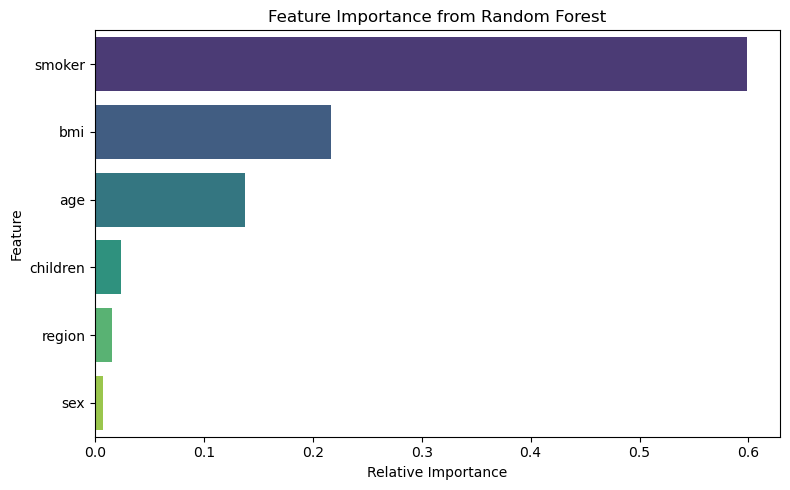

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances (bar chart)
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Interpretation:

  -  Smoker status is by far the most important predictor — likely due to its strong association with medical risk.

  - BMI and age also have a large effect on charges.

  -  Sex, region, and number of children have much smaller impacts.